In [2]:
from simple_pe import detectors
import numpy as np
from pycbc import waveform, strain, psd
import pylab as plt
from scipy.interpolate import RegularGridInterpolator

In [3]:
ifos = ['H1', 'L1', 'E1', 'E2', 'E3']
psd_name = {'H1':'CosmicExplorerP1600143',
        'L1':'CosmicExplorerP1600143',
        'E1':'EinsteinTelescopeP1600143',
        'E2':'EinsteinTelescopeP1600143',
        'E3':'EinsteinTelescopeP1600143',
       }
f_low = {i:5 for i in ifos}

In [4]:
ifo = 'H1'
psds = {}

In [5]:
m1 = m2 = 1.4
f_high = 4096
length = strain.strain.next_power_of_2(
                int(waveform.compress.rough_time_estimate(m1, m2,
                float(f_low[ifo]))))
length = 256
psds[ifo] = psd.analytical.from_string(psd_name[ifo], 
                                                   length * f_high + 1, 
                                                   1/length,
                                                    f_low[ifo])

In [6]:
mc_min = 1.
mc_max = 1000.
eta_min = 0.04
eta_max = .25
dlog_mc = 0.3
deta = .02

In [7]:
lmcs, etas = np.mgrid[np.log10(mc_min):np.log10(mc_max):dlog_mc, eta_max:eta_min:-deta]
mcs = 10**(lmcs)

In [8]:
mcs, etas

(array([[  1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ],
        [  1.99526231,   1.99526231,   1.99526231,   1.99526231,
           1.99526231,   1.99526231,   1.99526231,   1.99526231,
           1.99526231,   1.99526231,   1.99526231],
        [  3.98107171,   3.98107171,   3.98107171,   3.98107171,
           3.98107171,   3.98107171,   3.98107171,   3.98107171,
           3.98107171,   3.98107171,   3.98107171],
        [  7.94328235,   7.94328235,   7.94328235,   7.94328235,
           7.94328235,   7.94328235,   7.94328235,   7.94328235,
           7.94328235,   7.94328235,   7.94328235],
        [ 15.84893192,  15.84893192,  15.84893192,  15.84893192,
          15.84893192,  15.84893192,  15.84893192,  15.84893192,
          15.84893192,  15.84893192,  15.84893192],
        [ 31.6227766 ,  31.6227766 ,  31.6227766 ,  31.6227766 ,
          31.6227766 ,  3

In [9]:
spin = 0

In [10]:
d_h = np.zeros_like(mcs)
f_mean = np.zeros_like(mcs)
f_sig = np.zeros_like(mcs)


In [11]:
for i, mc in np.ndenumerate(mcs):
    d_h[i], f_mean[i], f_sig[i] = detectors.calc_reach_bandwidth([mc, etas[i]], spin, 
                                                                 approximant='IMRPhenomD', 
                                                                 psd=psds[ifo], fmin=f_low[ifo], 
                                                                 thresh=8., mass_configuration="chirp")


2025-01-21  17:10:53 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2025-01-21  17:10:53 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2025-01-21  17:10:54 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2025-01-21  17:10:54 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2025-01-21  17:10:54 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2025-01-21  17:10:54 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2025-01-21  17:10:55 PESummary WARNING : Could not find f_final in input file and one was not passed from 

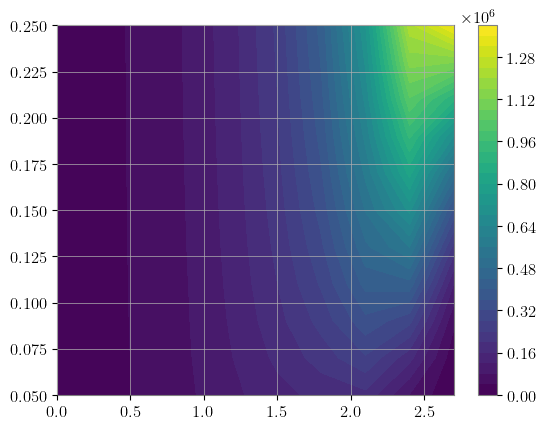

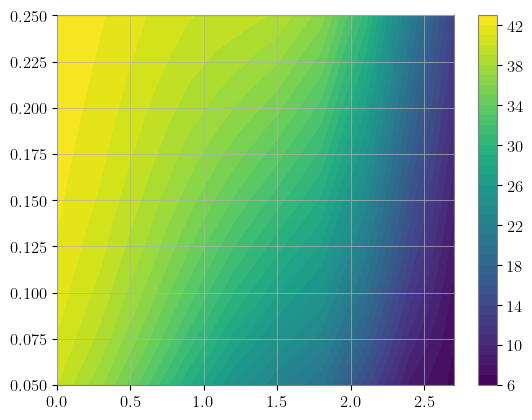

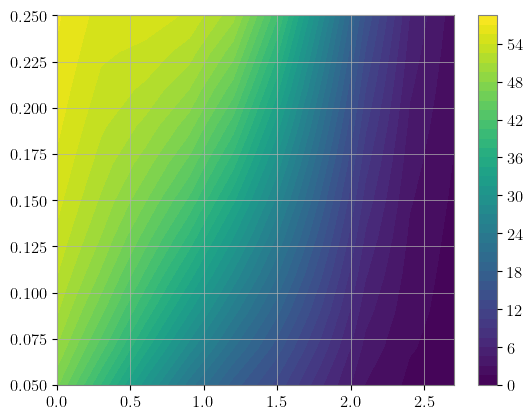

In [12]:
plt.figure()
plt.contourf(lmcs, etas, d_h, levels=40) 
plt.colorbar()

plt.figure()
plt.contourf(lmcs, etas, f_mean, levels=40)
plt.colorbar()

plt.figure()
plt.contourf( lmcs, etas, f_sig, levels=40)
plt.colorbar()

In [13]:
d_h_interp = RegularGridInterpolator((mcs[:,0], etas[0,:]), d_h)

In [14]:
d_h_interp((1, 0.25))

array(15869.03854516)